In [1]:
# http://www.cse.chalmers.se/~richajo/dat450/assignments/assignment1.html

## Warmup: computing word frequencies

In [28]:
from collections import Counter,defaultdict
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [29]:
ENCODING = ['ISO-8859-1']#,'UTF-8']
file_names = ['europarl.txt', 'wikipedia.txt','books.txt']


In [70]:

for file_name in file_names:
    freqs = Counter()
    for encoding in ENCODING:
        with open('a1_data/'+file_name, encoding=encoding) as f:
            for line in f:
                tokens = line.lower().split()
                for token in tokens:
                    freqs[token] += 1
        print(f"Most frequent words in: {file_name} and encoding {encoding}")
        print(10*"=")
        for word, freq in freqs.most_common(10):
            print(word, freq)
            
            
            
            

Most frequent words in: europarl.txt and encoding ISO-8859-1
the 3003924
, 2115604
. 1536501
of 1422251
to 1341423
and 1158191
in 945124
that 732141
a 673990
is 671961
Most frequent words in: wikipedia.txt and encoding ISO-8859-1
the 3158463
, 2566261
. 1956600
of 1534698
and 1260516
in 1205759
a 958283
to 926287
- 548244
is 522101
Most frequent words in: books.txt and encoding ISO-8859-1
the 2425678
, 2064433
. 1958494
and 1367843
of 1321821
to 1159024
a 1103939
is 792900
in 739009
i 704436


In [71]:
freqs.most_common(10)

[('the', 2425678),
 (',', 2064433),
 ('.', 1958494),
 ('and', 1367843),
 ('of', 1321821),
 ('to', 1159024),
 ('a', 1103939),
 ('is', 792900),
 ('in', 739009),
 ('i', 704436)]

### dictionary-within-dictionary
find the words that most frequently follow the word red.

In [31]:
freqs = defaultdict(Counter)
for file_name in file_names:
    freqs = defaultdict(Counter)
    with open('a1_data/'+file_name, encoding='ISO-8859-1') as f:
        for line in f:
            tokens = line.lower().split()
            for t1, t2 in zip(tokens, tokens[1:]):
                freqs[t1][t2] += 1
    print(f"10 Most common words after 'red' in: {file_name} is:")
    words = freqs["red"].most_common(10)
    
    w = "Words"
    fre = "Frequency"
    print(f"{w} {fre:>{30}}")
    for word, freq in words:
        print(f"{word:{10}} {freq:>{20}}")
    print("\n")

10 Most common words after 'red' in: europarl.txt is:
Words                      Frequency
tape                        856
cross                       213
card                         54
lines                        37
and                          26
army                         26
light                        25
line                         23
,                            22
.                            18


10 Most common words after 'red' in: wikipedia.txt is:
Words                      Frequency
,                           532
sox                         495
and                         467
-                           454
army                        404
cross                       278
.                           213
wings                       208
sea                         177
river                       166


10 Most common words after 'red' in: books.txt is:
Words                      Frequency
sox                         198
herrings                    175
,                    

## Investigating the word frequency distribution

In [5]:
def plot_most_frequent_words(file_name,n):
    freqs = Counter()
    with open('a1_data/'+file_name, encoding='ISO-8859-1') as f:
        for line in f:
            tokens = line.lower().split()
            for token in tokens:
                freqs[token] += 1

    #Plot
    Word = []
    Freq = []
    for word, freq in freqs.most_common(n):
        Word.append(word)
        Freq.append(freq)
    plt.subplots(figsize=(25,4));
    plt.bar(Word,Freq);
    plt.xticks(rotation=90);

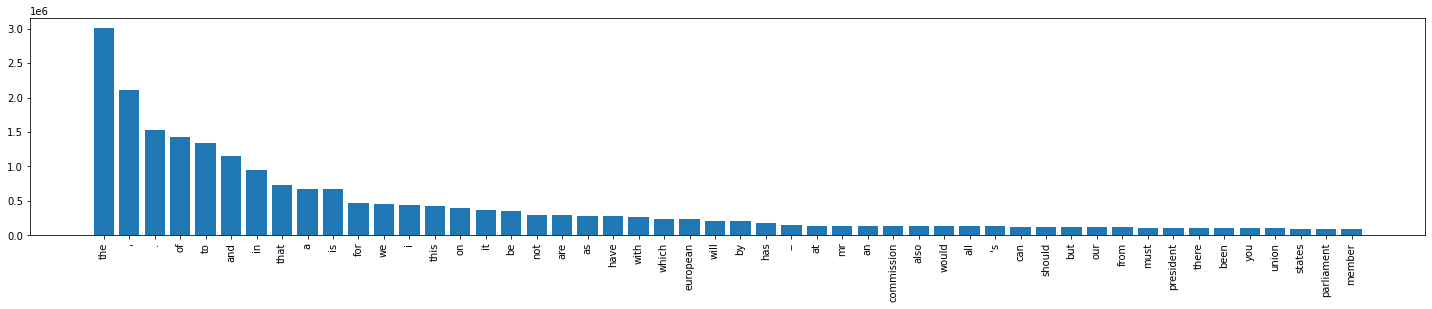

In [6]:
plot_most_frequent_words('europarl.txt',50)

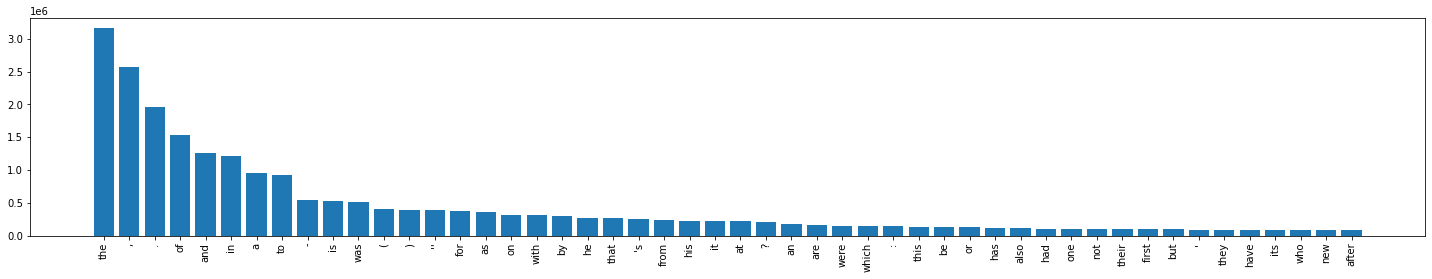

In [80]:
plot_most_frequent_words('wikipedia.txt',50)

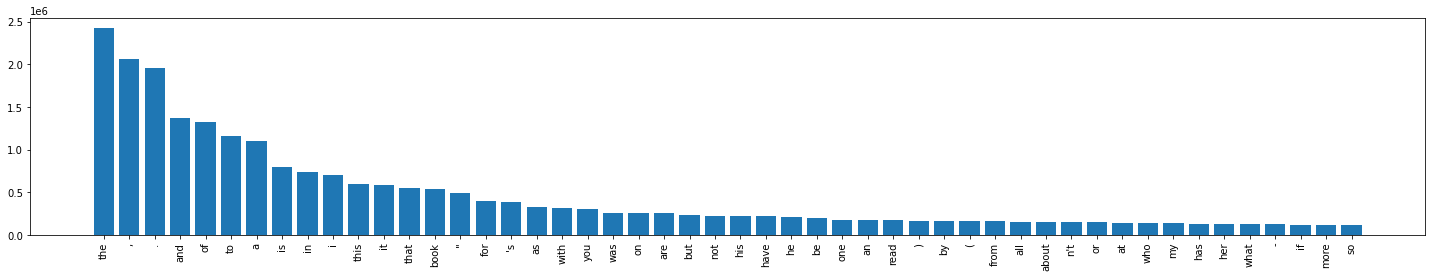

In [90]:
plot_most_frequent_words('books.txt',50)

 #### Zipf's law

 - Disussion !!!
 https://www.youtube.com/watch?v=4dofBw9r0P4

## Comparing corpora

In [81]:
# Vad är typiska ord för varje bok. Tex gör enräkna bort de som ingår i varje text 


## Side show: preprocessing text for machine learning
TODO: 
1. Enode the data. Enode one word to one integer **Done**
2. Make batching. convert a small set of texts into a matrix where each row represents one text (e.g. a document or sentence). **Make use of padding if necessary**

### 1. Encoding

In [ ]:
#### TODO ####
"""
1. Läs in raw text ord för ord och gör om allt till lower -Done
2. Skapa en vocab baserat på vanligaste ordern
3. Skapa avkodning
4. Skapa avkodad paddad text
"""


# Öppna texten som rader. 
# Koda av 
# Padda rader med -1
# Dela upp i batches 

In [116]:
with open('a1_data/europarl.txt', encoding='ISO-8859-1') as f:
    # 1. Read in lines and set to lower
    raw_text = f.readlines()  # List of complete texyt

# Make all characters lower
raw_text  = [raw_text[i].lower() for i in range(len(raw_text))] 
    
# Split list into list with sublists (lower)
raw_text_splitted = [raw_text[i].split() for i in range(len(raw_text))] 

In [68]:
# 2. Get vocabulary of most frequent words
max_voc_size=1000
freqs = Counter()
for line in raw_text:
    #tokens = line.lower().split()
    tokens = line.split()
    for token in tokens: 
        freqs[token] += 1
vocabulary_characters =  [word[0] for word in freqs.most_common(max_voc_size)]
vocabulary = dict(enumerate(vocabulary_characters,start=0))

NameError: name 'raw_text' is not defined

In [184]:
# Create decoder
flat_list = []
for sublist in raw_text_splitted:
    for item in sublist:
        flat_list.append(item)
decode = dict(enumerate(set(flat_list)))
decode.update({-1:""}) # Add -1 encoded to -1 in order
encode = {char: ind for ind,char in dec.items()}

In [185]:
# 4 Create decoded text with padding
max_sentence_length = len(max(raw_text_splitted, key=len)) # Get max length of sentence (text is a list of lists: Function get max len of lists in a list)
encoded_text = np.ones([len(raw_text_splitted), max_sentence_length])*-1 #Initiate matrix for decoded ords (padded with -1)


In [186]:
for row in range(len(raw_text_splitted)):
    for word in range(len(raw_text_splitted[row])):
        decoded_text[row,word] = decoded_text


In [ ]:
class Vocab():
    def __init__(self,f):
        self.f = f
        
    def build_vocab(self):
        return self.f.readlines()


### 2 Batch

In [121]:
len(encoded_text)

17

## Trying out an NLP toolkit

In [216]:
import spacy

In [33]:
nlp = spacy.load('en_core_web_sm')

### Processing a text

In [34]:
example = 'Apple bought two companies this year and no one knew, Mark Gurman at 9to5Mac reports.'

In [35]:
result = nlp(example)

In [36]:
for r in result: 
    #print(r.text)
    break 
    print(dir(r))

In [11]:
#dir(r)

### Visualizing the results

In [177]:
from spacy import displacy
# Skriv dep för ordklass ent för ??
displacy.render(result, style='dep', jupyter=True)

### Accessing the results in your code
- token.text, the text of the token: for instance, the fourth of the tokens in the previous example is "companies"
- token.pos_, the part-of-speech tag: "NOUN" for the same token **ORDKLASS**
- token.lemma_, the uninflected base form or dictionary form: "company" **DEN OBÖJDA BASFORMEN**
- token.head, a reference to the parent token in the dependency graph: "bought" **REF till överordnad token. Tex. vad gjorde apple, -vad-> Köpte. Detta -vad-> Året**
- token.dep_, the label on the edge in the dependency tree between the head and this token: "dobj" (direct object)

In [179]:
for token in result:
    print(token.text, token.pos_, token.lemma_, token.head, token.dep_)

it PRON it took nsubj
took VERB take took ROOT
me PRON I took dobj
two NUM two days nummod
days NOUN day took npadvmod
to PART to read aux
read VERB read took xcomp
this DET this book det
book NOUN book read dobj
because SCONJ because put mark
once SCONJ once started mark
i PRON I started nsubj
started VERB start put advcl
i PRON I put nsubj
could AUX could put aux
n't PART n't put neg
put VERB put took advcl
it PRON it put dobj
down ADP down put prt
. PUNCT . took punct
mr.magnus PRON mr.magnus leads nsubj
leads VERB lead leads ROOT
us PRON we leads dobj
through ADP through leads prep
various ADJ various exercises amod
exercises NOUN exercise through pobj
to PART to show aux
show VERB show leads advcl
us PRON we show dobj
how ADV how have advmod
we PRON we have nsubj
too ADV too we advmod
can AUX can have aux
have VERB have show ccomp
an DET an projection det
astral ADJ astral projection amod
projection NOUN projection have dobj
. PUNCT . leads punct
the DET the exercises det
exercise

###### Similarly, we can process the named entities:

In [180]:
for entity in result.ents:
    print(entity.text ,entity.label_)

two days DATE


## Additional questions
1. What are the most common nouns in Books

In [181]:
nlp = spacy.load('en_core_web_sm')

In [300]:
# Load in text data
ENCODING = ['ISO-8859-1']
file_names = ['europarl.txt', 'wikipedia.txt','books.txt']

with open('a1_data/'+file_names[2], encoding=ENCODING[0]) as f:
    text = f.read()


In [301]:
print(text[:200])

it took me two days to read this book because once i started i could n't put it down . mr.magnus leads us through various exercises to show us how we too can have an astral projection . the exercises 


In [302]:
len(text)

256441196

In [303]:
text = str(text)


In [304]:
result = nlp(text)
#result[:10]

ValueError: [E088] Text of length 256441196 exceeds maximum of 1000000. The parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

In [299]:
freqs = Counter()
for token in result:
    #print(token.pos_)
    if token.pos_ == "NOUN": 
        #print(token.text)
        freqs[token.text] += 1
freqs.most_common(10)    

[('book', 8),
 ('exercises', 2),
 ('reader', 2),
 ('subject', 2),
 ('days', 1),
 ('projection', 1),
 ('entries', 1),
 ('journal', 1),
 ('ability', 1),
 ('realm', 1)]

In [132]:
for token in result:
    print(token.text, token.pos_)

i PRON
took VERB
an DET
african ADJ
arts NOUN
class NOUN
with ADP
poynor NOUN
and CCONJ
he PRON
used VERB
this DET
book NOUN
and CCONJ
the DET
slide NOUN
images NOUN
. PUNCT
this DET
was AUX
a DET
wonderful ADJ
tool NOUN
. PUNCT
i PRON
usually ADV
hate VERB
reading VERB
art NOUN
books NOUN
but CCONJ
this DET
one NUM
read VERB
like ADP
a DET
recreational ADJ
book NOUN
. PUNCT
great ADJ
illustrations NOUN
! PUNCT
if SCONJ
u PROPN
would AUX
like VERB
to PART
learn VERB
more ADJ
about ADP
the DET
culture NOUN
this DET
is VERB
definately ADV
the DET
book NOUN
to PART
get VERB

 SPACE
